<a href="https://colab.research.google.com/github/kbrezinski/CS224W-GraphML/blob/main/notebooks/practice_graph_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from platform import python_version

print(torch.__version__)
print(python_version())

1.11.0+cu113
3.7.13


In [4]:
!pip install torch-scatter torch-sparse \
 torch-cluster torch-spline-conv torch-geometric \
-f https://data.pyg.org/whl/torch-1.11.0+cu113.html -q
#!pip install ogb

     |████████████████████████████████| 7.9 MB 4.4 MB/s 
     |████████████████████████████████| 3.5 MB 22.4 MB/s 
     |████████████████████████████████| 2.5 MB 9.4 MB/s 
     |████████████████████████████████| 750 kB 41.2 MB/s 
     |████████████████████████████████| 407 kB 5.1 MB/s 


In [14]:
import networkx as nx
import torch_geometric
from torch_geometric.datasets import Planetoid
import matplotlib.pyplot as plt

dataset = Planetoid('root', 'Cora')
dataset = dataset[0]
g = torch_geometric.utils.to_networkx(dataset)

In [18]:
node_degree = sorted((d for n, d in g.degree()), reverse=True)
node_degree[:10]

[336, 156, 148, 130, 88, 84, 80, 72, 68, 66]

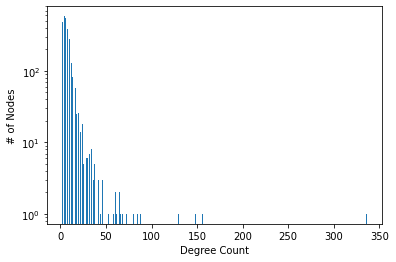

In [26]:
plt.hist(node_degree, bins='auto')

plt.xlabel('Degree Count')
plt.ylabel('# of Nodes')
plt.yscale('log')
plt.show()

In [30]:
g_und = g.to_undirected()
for C in (g_und.subgraph(c).copy() for c in nx.connected_components(g_und)):
    print(nx.average_shortest_path_length(C))

6.310998681298742
1.0
1.0
1.3
3.2184615384615385
1.6071428571428572
1.0
1.3333333333333333
1.0
1.3611111111111112
1.0
1.0
1.6
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.3333333333333333
1.0
1.1666666666666667
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.6666666666666667
1.0
1.0
1.0
1.0
1.6
1.0
1.0
1.0
1.3333333333333333
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.3333333333333333
1.1666666666666667
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.3
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.6666666666666667
1.0
